Now we will continue to testing the PSA algorithm and at the end we will compare two to each other.


In [8]:
# Once again we import the necessary commons
from commons import *

processing_times = m1

We defined forward_prop function this is the same as in the previous notebook


In [9]:
def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules


Parameters in low complexity are also exact same


In [10]:

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)

Now we start our tests for the low complexity


In [11]:
from tabnanny import verbose
import time
import pyswarms as ps

times_5x5 = []
results_5x5 = []
for _ in range(100):
    optimizer = ps.single.GlobalBestPSO(
        n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)

    start = time.time()
    stats = optimizer.optimize(forward_prop, iters=100, verbose=False)
    end = time.time()

    times_5x5.append(end - start)
    results_5x5.append(stats[0])


In [12]:
# The methodology is the exact same as we used in ga-efficiency.ipynb also we used the same parameters for specifying accuracy
good_results_5x5: list[list[int, float]] = []
for i in range(len(results_5x5)):
    if results_5x5[i] < 247.0:
        good_results_5x5.append((i, results_5x5[i]))

accuracy_5x5 = len(good_results_5x5) / len(results_5x5) * 100
print(f"Accuracy: {accuracy_5x5}%")

good_times_5x5 = [times_5x5[i] for i, _ in good_results_5x5]

good_times_5x5_mean = np.inf
if len(good_times_5x5) != 0:
    good_times_5x5_mean = np.mean(good_times_5x5) * 1000
print(f"Average time: {good_times_5x5_mean}ms")


Accuracy: 0.0%
Average time: infms


For this level of complexity PSA fails spectacularly. Not even it's slow but it doesn't even achieve even closely what GA does. But it's only for low level complexity level.


In [13]:
processing_times = m4


def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules


x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)


In [14]:
times_10x10 = []
results_10x10 = []
for _ in range(100):
    optimizer = ps.single.GlobalBestPSO(
        n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)

    start = time.time()
    stats = optimizer.optimize(forward_prop, iters=100, verbose=False)
    end = time.time()

    times_10x10.append(end - start)
    results_10x10.append(stats[0])


In [15]:
good_results_10x10: list[list[int, float]] = []
for i in range(len(results_10x10)):
    if results_10x10[i] < 1010.0:
        good_results_10x10.append((i, results_10x10[i]))

accuracy_10x10 = len(good_results_10x10) / len(results_10x10) * 100
print(f"Accuracy: {accuracy_10x10}%")

good_times_10x10 = [times_10x10[i] for i, _ in good_results_10x10]

good_times_10x10_mean = np.inf
if len(good_times_10x10) != 0:
    good_times_10x10_mean = np.mean(good_times_10x10) * 1000
print(f"Average time: {good_times_10x10_mean}ms")


Accuracy: 100.0%
Average time: 666.6221117973328ms


Now the time is much a little longer on average than GA but the accuracy for the same level is much better.


In [16]:
processing_times = m7


def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules


x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)

In [17]:
times_15x15 = []
results_15x15 = []
for _ in range(100):
    optimizer = ps.single.GlobalBestPSO(
        n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)

    start = time.time()
    stats = optimizer.optimize(forward_prop, iters=100, verbose=False)
    end = time.time()

    times_15x15.append(end - start)
    results_15x15.append(stats[0])

In [18]:

good_results_15x15: list[list[int, float]] = []
for i in range(len(results_15x15)):
    if results_15x15[i] < 2350.0:
        good_results_15x15.append((i, results_15x15[i]))

accuracy_15x15 = len(good_results_15x15) / len(results_15x15) * 100
print(f"Accuracy: {accuracy_15x15}%")

good_times_15x15 = [times_15x15[i] for i, _ in good_results_15x15]

good_times_15x15_mean = np.inf
if len(good_times_15x15) != 0:
    good_times_15x15_mean = np.mean(good_times_15x15) * 1000
print(f"Average time: {good_times_15x15_mean}ms")


Accuracy: 100.0%
Average time: 1419.97474193573ms


And again the accuracy is 100% percent, but the time is not so good


In [19]:
from pandas import DataFrame

d = {"5x5.accuracy": [accuracy_5x5], "5x5.good_times_mean": [good_times_5x5_mean], "10x10.accuracy": [accuracy_10x10],
     "10x10.good_times_mean": [good_times_10x10_mean], "15x15.accuracy": [accuracy_15x15], "15x15.good_times_mean": [good_times_15x15_mean]}
df = DataFrame(data=d)

display(df)


,5x5.accuracy,5x5.good_times_mean,10x10.accuracy,10x10.good_times_mean,15x15.accuracy,15x15.good_times_mean
0,0.0,inf,100.0,666.622112,100.0,1419.974742


<Axes: title={'center': 'Mean Time'}, xlabel='Time (ms)'>

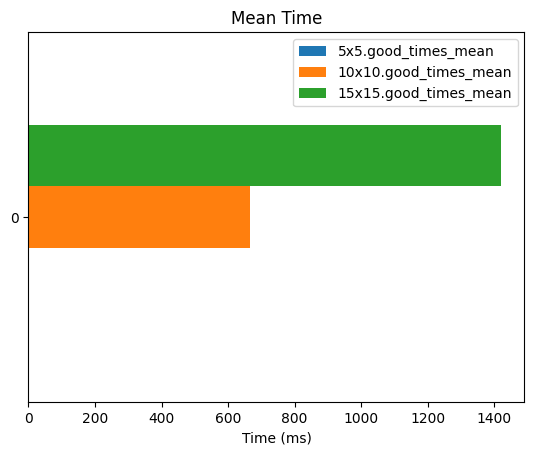

In [20]:
df.plot.barh(y=["5x5.good_times_mean", "10x10.good_times_mean",
             "15x15.good_times_mean"], title="Mean Time", xlabel="Time (ms)")

Since the easiest level did not achieve our level of accuracy it's time is not included.
